[{'label': 'Fruit', 'score': 0.9957869648933411}, {'label': 'Egg', 'score': 0.002114910166710615}, {'label': 'Bread', 'score': 0.0008424092084169388}, {'label': 'Vegetable', 'score': 0.0006432273075915873}, {'label': 'Fried Food', 'score': 0.00012941958266310394}]
Predicted food category: Fruit


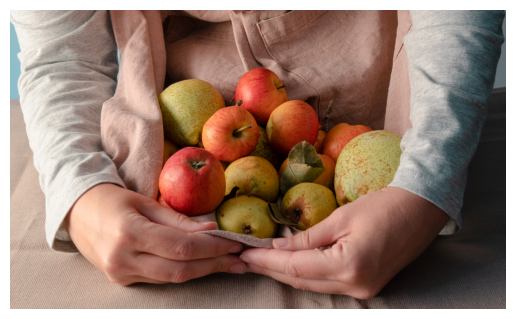

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from transformers import pipeline
from transformers.utils import logging
# Only show error messages from the transformers library to reduce the amount of log output
logging.set_verbosity_error()

import warnings
# Ignore all Python warnings to keep the output clean
warnings.filterwarnings("ignore")

# Helper function to convert image to RGB format
def convert_to_rgb(image):
    """
    Converts an image to RGB format.

    Parameters:
    image (PIL.Image): An image object.

    Returns:
    PIL.Image: Image object in RGB format.
    """
    return image.convert('RGB')

# Read and convert the image
image_path = 
image_raw = Image.open(image_path)
image = convert_to_rgb(image_raw)

# Display the image
plt.imshow(image)
plt.axis('off')

# Define the model ID for the pre-trained food category classification model
modelId = "Kaludi/food-category-classification-v2.0"

# Load the image classification pipeline using the specified model ID
model = pipeline("image-classification", model=modelId)

# Save the pre-trained model to a local directory
model.save_pretrained(save_directory=f"models/{modelId}")

# Get the probabilities across different food categories
class_scores=model(image)
print(class_scores)

# Get the class with the highest score
highest_probability = max(class_scores, key=lambda x: x['score'])
highest_probability_class = highest_probability['label']

# Print the label of the highest probability class for the uploaded image
print(f"Predicted food category: {highest_probability_class}")